<a href="https://colab.research.google.com/github/PrabhatGyanendraShukla/DTSCMLAIRDMP/blob/main/applied_machine_learning_online_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jainilcoder_online_payment_fraud_detection_path = kagglehub.dataset_download('jainilcoder/online-payment-fraud-detection')

print('Data source import complete.')


100%|██████████| 178M/178M [00:02<00:00, 82.3MB/s]

Extracting files...


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# Metrics
from sklearn.metrics import (accuracy_score,
                            classification_report,
                            confusion_matrix ,
                            precision_score,
                            recall_score,
                            f1_score)


# Classification Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier
)

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight

# Distributions for hyperparameter search
from scipy.stats import uniform, randint
df=pd.read_csv(f"{jainilcoder_online_payment_fraud_detection_path}/onlinefraud.csv")

In [ ]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [ ]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3423395,256,PAYMENT,3215.30,C1576471199,14.0,0.00,M835227504,0.0,0.0,0,0
6305920,684,PAYMENT,22796.20,C544505084,25943.0,3146.80,M793882891,0.0,0.0,0,0
2069168,181,PAYMENT,3464.89,C1135100292,69297.0,65832.11,M1629960861,0.0,0.0,0,0
6135277,544,PAYMENT,33792.40,C1212743650,115333.0,81540.60,M1996258962,0.0,0.0,0,0
831345,41,PAYMENT,10484.67,C954748815,35888.0,25403.33,M2098259205,0.0,0.0,0,0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['step'].plot(kind='hist', bins=20, title='step')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['amount'].plot(kind='hist', bins=20, title='amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['oldbalanceOrg'].plot(kind='hist', bins=20, title='oldbalanceOrg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('nameOrig').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('nameDest').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='step', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='step', y='amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='amount', y='oldbalanceOrg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='oldbalanceOrg', y='newbalanceOrig', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['oldbalanceDest']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('oldbalanceDest', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('nameOrig')):
  _plot_series(series, series_name, i)
  fig.legend(title='nameOrig', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('oldbalanceDest')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['oldbalanceDest']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('oldbalanceDest', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('nameDest')):
  _plot_series(series, series_name, i)
  fig.legend(title='nameDest', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('oldbalanceDest')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['oldbalanceDest']
  ys = series['step']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('oldbalanceDest', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('nameOrig')):
  _plot_series(series, series_name, i)
  fig.legend(title='nameOrig', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('oldbalanceDest')
_ = plt.ylabel('step')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['oldbalanceDest']
  ys = series['step']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('oldbalanceDest', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('nameDest')):
  _plot_series(series, series_name, i)
  fig.legend(title='nameDest', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('oldbalanceDest')
_ = plt.ylabel('step')

from matplotlib import pyplot as plt
_df_14['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['step'].plot(kind='line', figsize=(8, 4), title='step')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['amount'].plot(kind='line', figsize=(8, 4), title='amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['oldbalanceOrg'].plot(kind='line', figsize=(8, 4), title='oldbalanceOrg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['nameDest'].value_counts()
    for x_label, grp in _df_18.groupby('nameOrig')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('nameOrig')
_ = plt.ylabel('nameDest')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['nameOrig'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='nameOrig', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['nameDest'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='nameDest', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['nameOrig'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='step', y='nameOrig', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['nameDest'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='step', y='nameDest', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# see th duplicated data
df.duplicated().sum()

np.int64(0)

In [ ]:
# see the number of the nan value
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
# print the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# describe numiercal columns in "df"
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


from matplotlib import pyplot as plt
_df_23['step'].plot(kind='hist', bins=20, title='step')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['amount'].plot(kind='hist', bins=20, title='amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['oldbalanceOrg'].plot(kind='hist', bins=20, title='oldbalanceOrg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['newbalanceOrig'].plot(kind='hist', bins=20, title='newbalanceOrig')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='step', y='amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='amount', y='oldbalanceOrg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='oldbalanceOrg', y='newbalanceOrig', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='newbalanceOrig', y='oldbalanceDest', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['step'].plot(kind='line', figsize=(8, 4), title='step')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['amount'].plot(kind='line', figsize=(8, 4), title='amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['oldbalanceOrg'].plot(kind='line', figsize=(8, 4), title='oldbalanceOrg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['newbalanceOrig'].plot(kind='line', figsize=(8, 4), title='newbalanceOrig')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2294456,187,TRANSFER,315738.26,C16957357,5096.0,0.00,C880358682,0.00,315738.26,0,0
4252864,306,CASH_OUT,202816.27,C1085154606,334.0,0.00,C394382395,1072993.76,1275810.02,0,0
4642461,330,CASH_OUT,148193.36,C564574603,0.0,0.00,C1304988900,2776160.76,2924354.12,0,0
1751931,161,CASH_OUT,316722.47,C1255882090,40212.0,0.00,C1173501410,21347.00,327914.68,0,0
393630,18,CASH_IN,160874.26,C1023761326,8058.0,168932.26,C335146465,348543.34,187669.07,0,0


from matplotlib import pyplot as plt
_df_35['step'].plot(kind='hist', bins=20, title='step')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36['amount'].plot(kind='hist', bins=20, title='amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37['oldbalanceOrg'].plot(kind='hist', bins=20, title='oldbalanceOrg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38['newbalanceOrig'].plot(kind='hist', bins=20, title='newbalanceOrig')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_39.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_40.groupby('nameOrig').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_41.groupby('nameDest').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42.plot(kind='scatter', x='step', y='amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43.plot(kind='scatter', x='amount', y='oldbalanceOrg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44.plot(kind='scatter', x='oldbalanceOrg', y='newbalanceOrig', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_45.plot(kind='scatter', x='newbalanceOrig', y='oldbalanceDest', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['newbalanceOrig']
  ys = series['step']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_46.sort_values('newbalanceOrig', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('newbalanceOrig')
_ = plt.ylabel('step')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['newbalanceOrig']
  ys = series['step']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_47.sort_values('newbalanceOrig', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('nameOrig')):
  _plot_series(series, series_name, i)
  fig.legend(title='nameOrig', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('newbalanceOrig')
_ = plt.ylabel('step')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['newbalanceOrig']
  ys = series['step']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_48.sort_values('newbalanceOrig', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('nameDest')):
  _plot_series(series, series_name, i)
  fig.legend(title='nameDest', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('newbalanceOrig')
_ = plt.ylabel('step')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['newbalanceOrig']
  ys = series['amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_49.sort_values('newbalanceOrig', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('newbalanceOrig')
_ = plt.ylabel('amount')

from matplotlib import pyplot as plt
_df_50['step'].plot(kind='line', figsize=(8, 4), title='step')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_51['amount'].plot(kind='line', figsize=(8, 4), title='amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_52['oldbalanceOrg'].plot(kind='line', figsize=(8, 4), title='oldbalanceOrg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_53['newbalanceOrig'].plot(kind='line', figsize=(8, 4), title='newbalanceOrig')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['nameOrig'].value_counts()
    for x_label, grp in _df_54.groupby('type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type')
_ = plt.ylabel('nameOrig')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['nameDest'].value_counts()
    for x_label, grp in _df_55.groupby('nameOrig')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('nameOrig')
_ = plt.ylabel('nameDest')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_56['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_56, x='step', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_57['nameOrig'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_57, x='step', y='nameOrig', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_58['nameDest'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_58, x='step', y='nameDest', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_59['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_59, x='amount', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

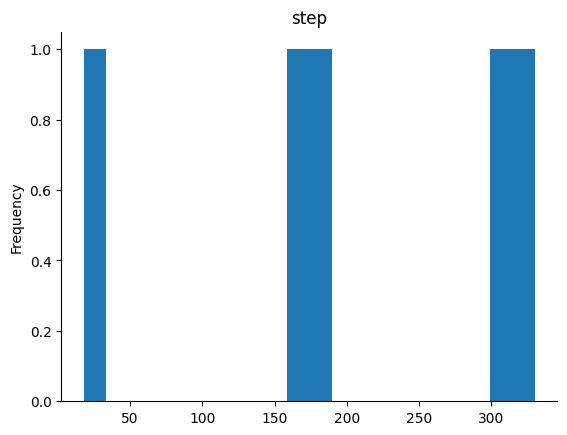

In [ ]:
from matplotlib import pyplot as plt
_df_35['step'].plot(kind='hist', bins=20, title='step')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Distribution of target
print(df["isFlaggedFraud"].value_counts())

In [ ]:
# Distribution of target
print(df["isFraud"].value_counts())

In [ ]:
# Distribution of target
print(df["nameOrig"].value_counts())

In [ ]:
# Distribution of target
print(df["nameDest"].value_counts())

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: loading your dataset (replace with your file path)
# df = pd.read_csv("onlinefraud.csv")

# 1. Check duplicate columns
duplicate_cols = df.columns[df.columns.duplicated()]
print("Duplicate columns:", list(duplicate_cols))

# 2. Compare 'isFraud' vs 'isFlaggedFraud'
fraud_counts = df[['isFraud', 'isFlaggedFraud']].sum()
print(fraud_counts)

# 3. Plot bar chart
plt.figure(figsize=(6,4))
fraud_counts.plot(kind='bar')
plt.title("Comparison of isFraud vs isFlaggedFraud")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.show()


In [ ]:
numeric_features = ["Age", "Income", "Number of Children"]

df[numeric_features].hist(figsize=(12,6), bins=20, edgecolor="black")
plt.suptitle("Distribution of Numerical Features")
plt.show()


In [ ]:
numeric_features = ["step", "amount"]

df[numeric_features].hist(figsize=(12,6), bins=20, edgecolor="black")
plt.suptitle("Distribution of Numerical Features")
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [ ]:
categorical_features = ["type"]

plt.figure(figsize=(14,8))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(14,6))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="isFraud", y=col, data=df)
    plt.title(f"{col} vs is Fraud")
plt.tight_layout()
plt.show()


In [ ]:
# Copy dataset
df_corr = df.copy()

# Encode categorical features for correlation
categorical_features = ["type" ,"nameOrig" ,"nameDest"]

le = LabelEncoder()
for col in categorical_features:
    df_corr[col] = le.fit_transform(df_corr[col])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Label Encoded)")
plt.show()


In [ ]:
df.sample()

In [ ]:
df.shape

In [ ]:
# ================================
# Imports
# ================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE

from scipy.stats import randint, uniform

# ================================
# Subset data
# ================================
fraud_df = df[df['isFraud'] == 1]
nonfraud_df = df[df['isFraud'] == 0].sample(
    n=min(200_000, len(df[df['isFraud'] == 0])),
    random_state=42
)
df_subset = pd.concat([fraud_df, nonfraud_df]).sample(frac=1, random_state=42)

print("Shape after subset:", df_subset.shape)
print("Fraud count:", df_subset['isFraud'].sum())

# ================================
# Define columns
# ================================
categorical_cols = ['type']
numeric_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
target = 'isFraud'

X = df_subset.drop(columns=[target])
y = df_subset[target]

label_enc = LabelEncoder()
y = label_enc.fit_transform(y)

# ================================
# Split train/test
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Before SMOTE:", np.bincount(y_train))

# ================================
# Preprocessing
# ================================
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Apply preprocessing on train/test separately
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# ================================
# Apply SMOTE
# ================================
smote = SMOTE(random_state=42, sampling_strategy="auto")
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)
print("After SMOTE:", np.bincount(y_train_balanced))

# ================================
# Class weights
# ================================
classes = np.unique(y_train_balanced)
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train_balanced)
class_weights_dict = dict(zip(classes, class_weights))
print("✅ Class Weights:", class_weights_dict)

sample_weights = compute_sample_weight(class_weight="balanced", y=y_train_balanced)

# ================================
# Models
# ================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42, class_weight="balanced"),
    "Extra Trees": ExtraTreesClassifier(n_jobs=-1, random_state=42, class_weight="balanced"),
    "K-Nearest Neighbors": KNeighborsClassifier(n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(
        verbose=0, random_state=42, allow_writing_files=False,
        class_weights=class_weights_dict
    )
}

# ================================
# Hyperparameter distributions
# ================================
param_distributions = {
    "Decision Tree": {
        "max_depth": randint(3, 20),
        "min_samples_split": randint(2, 10)
    },
    "Random Forest": {
        "n_estimators": randint(30, 150),
        "max_depth": randint(3, 20)
    },
    "Extra Trees": {
        "n_estimators": randint(30, 150),
        "max_depth": randint(3, 20)
    },
    "AdaBoost": {
        "n_estimators": randint(50, 200),
        "learning_rate": uniform(0.01, 0.5)
    },
    "CatBoost": {
        "depth": randint(4, 10),
        "learning_rate": uniform(0.01, 0.3),
        "n_estimators": randint(100, 300)
    }
}

# ================================
# Training + Evaluation
# ================================
results = {}
tuned_models = {}

for name, classifier in models.items():
    print(f"🔍 Training {name} ...")

    if name in param_distributions:
        random_search = RandomizedSearchCV(
            classifier,
            param_distributions=param_distributions[name],
            n_iter=5,
            cv=3,
            n_jobs=-1,
            scoring="f1_macro",
            random_state=42
        )
        if name in ["AdaBoost"]:
            random_search.fit(X_train_balanced, y_train_balanced, sample_weight=sample_weights)
        else:
            random_search.fit(X_train_balanced, y_train_balanced)
        tuned_model = random_search.best_estimator_
        print(f"✅ Best params for {name}: {random_search.best_params_}")
    else:
        if name in ["AdaBoost"]:
            classifier.fit(X_train_balanced, y_train_balanced, sample_weight=sample_weights)
        else:
            classifier.fit(X_train_balanced, y_train_balanced)
        tuned_model = classifier

    tuned_models[name] = tuned_model

    # Evaluation
    y_pred = tuned_model.predict(X_test_processed)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
    rec = recall_score(y_test, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)

    results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}
    print(f"📊 {name} → Acc={acc:.2f}, Prec={prec:.2f}, Recall={rec:.2f}, F1={f1:.2f}\n")

# ================================
# Summary
# ================================
results_df = pd.DataFrame(results).T.sort_values(by="F1", ascending=False)
print("✅ Final Summary:")
print(results_df)


In [ ]:
results_df